In [28]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Membaca Dataset
df = pd.read_csv('/content/drive/My Drive/DataSet_Tugas.csv')

# 2. EDA & Pre-Processing

In [31]:
# Menampilkan Informasi Dataset
print("Dataset Info :")
print(df.info())
print("\nMissing Values :")
print(df.isnull().sum())
print("\nStatistical Summary :")
print(df.describe())

Dataset Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values :
sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

Statistical Summary :
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000

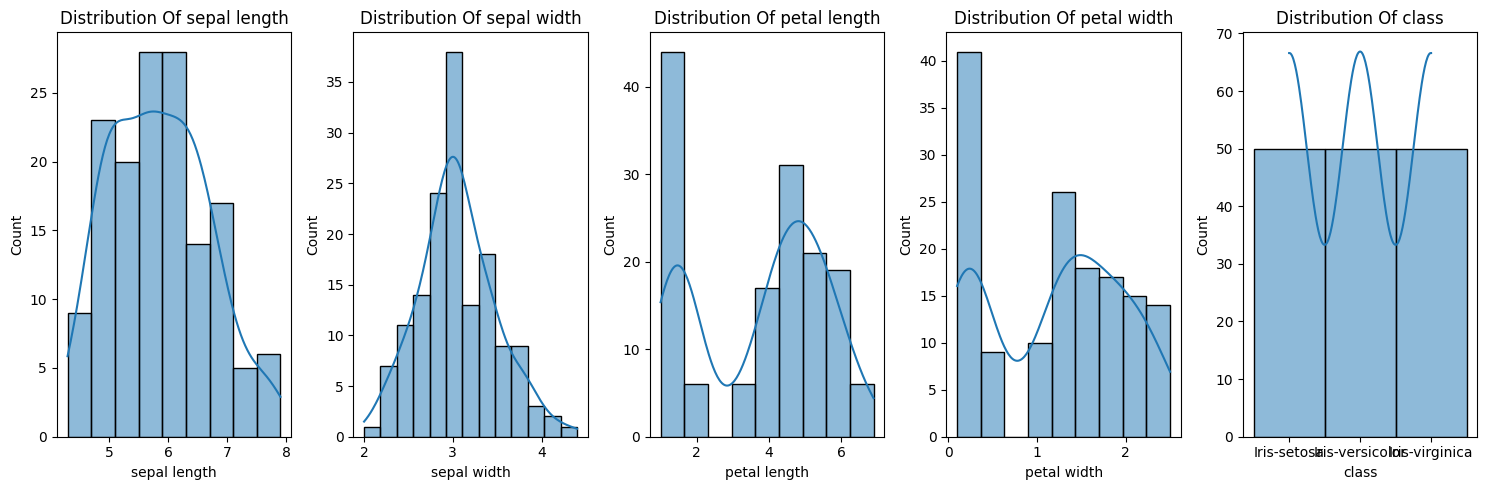

In [32]:
# Visualisasi Distribusi Data
plt.figure(figsize=(15, 5))
for i, column in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution Of {column}')
plt.tight_layout()
plt.show()

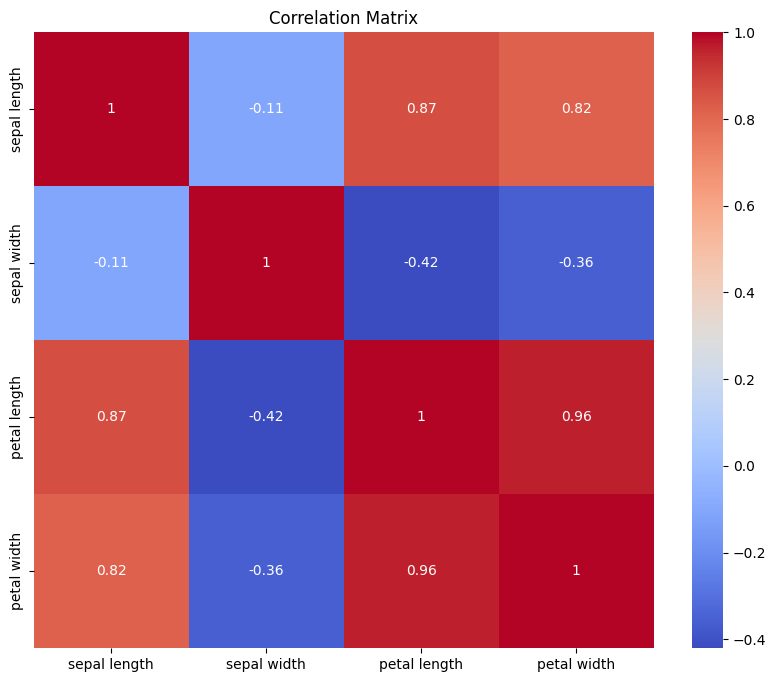

In [33]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Standardize Features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

In [35]:
# Cek Hasil Standarisasi
print("\nHasil Standarisasi :")
print(df_scaled.describe())

# Cek Nama-Nama Kolom
print("\nKolom Dalam Dataset :")
print(df_scaled.columns.tolist())


Hasil Standarisasi :
       sepal length   sepal width  petal length   petal width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -6.631732e-16  3.315866e-16 -2.842171e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00

Kolom Dalam Dataset :
['sepal length', 'sepal width', 'petal length', 'petal width', 'class']


# 3. K-Means Clustering

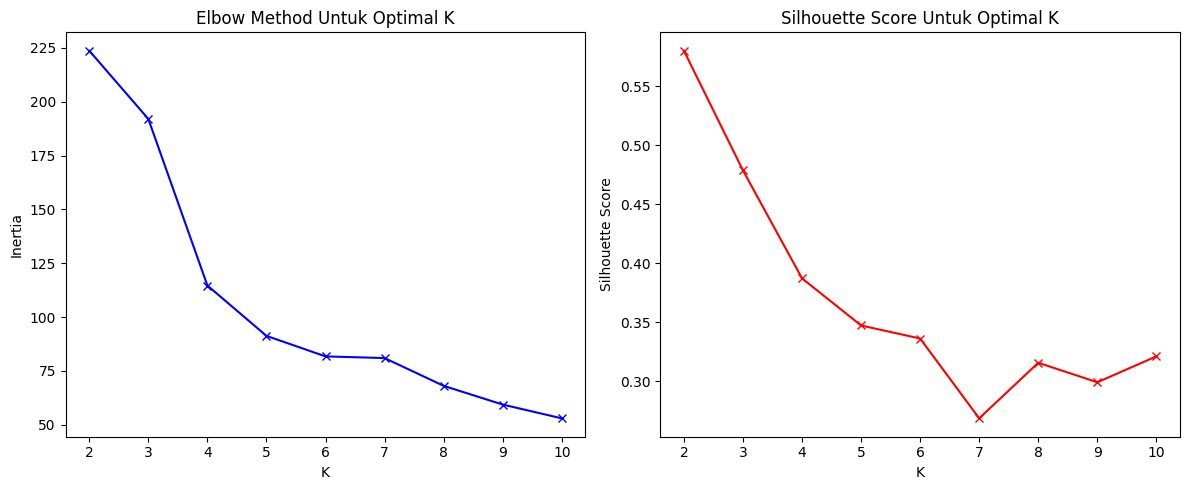


Nilai K Optimal Berdasarkan Silhouette Score : 2


In [36]:
# Gunakan Kolom Numerik Yang Sudah Di-Scaling
numeric_df_scaled = df_scaled[numeric_features]

# Elbow Method Untuk Menentukan K Optimal
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_df_scaled)

    # Hitung Inertia
    inertias.append(kmeans.inertia_)

    # Hitung Silhouette Score
    silhouette_scores.append(silhouette_score(numeric_df_scaled, kmeans.labels_))

# Visualisasi Hasil Elbow Method
plt.figure(figsize=(12, 5))

# Plot Inertia
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method Untuk Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Untuk Optimal K')

plt.tight_layout()
plt.show()

# Print Nilai Optimal Berdasarkan Silhouette Score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nNilai K Optimal Berdasarkan Silhouette Score : {optimal_k}")

# 4. DBSCAN Clustering

Variance Ratio : [0.72770452 0.23030523]
Total Variance Captured : 0.9580097536148199


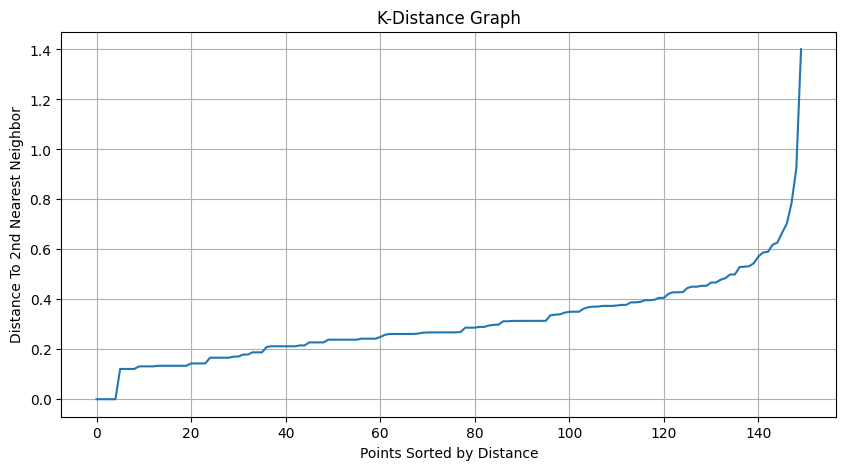

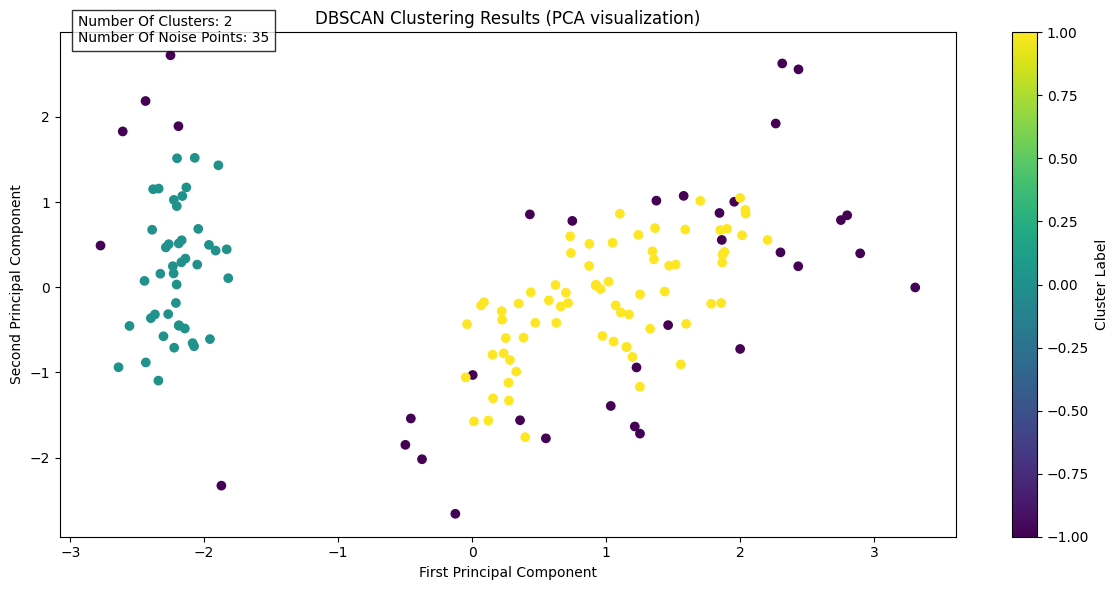


Hasil DBSCAN Clustering :
Jumlah Cluster : 2
Jumlah Noise Points : 35

Jumlah Sampel Di Setiap Cluster :
Cluster 0: 44
Cluster 1: 71
Noise Points: 35


In [37]:
# Gunakan Fitur Numerik Yang Sudah Di-Scaling
numeric_df_scaled = df_scaled[numeric_features]

# Gunakan PCA Untuk Visualisasi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(numeric_df_scaled)

# Plot Variance Ratio
print("Variance Ratio :", pca.explained_variance_ratio_)
print("Total Variance Captured :", sum(pca.explained_variance_ratio_))

# Tentukan EPS Menggunakan K-Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(numeric_df_scaled)
distances, indices = neighbors_fit.kneighbors(numeric_df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot K-Distance Graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points Sorted by Distance')
plt.ylabel('Distance To 2nd Nearest Neighbor')
plt.grid(True)
plt.show()

eps_value = 0.5

# DBSCAN Clustering
dbscan = DBSCAN(eps=eps_value, min_samples=5)
cluster_labels = dbscan.fit_predict(numeric_df_scaled)

# Tambahkan Label Ke DataFrame Asli
df['Label_DBSCAN'] = cluster_labels

# Visualisasi Hasil Clustering Menggunakan PCA
plt.figure(figsize=(12, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering Results (PCA visualization)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster Label')

# Tambahkan Informasi Cluster
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)
plt.text(0.02, 0.98, f'Number Of Clusters: {n_clusters}\nNumber Of Noise Points: {n_noise}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print Hasil Clustering
print("\nHasil DBSCAN Clustering :")
print(f"Jumlah Cluster : {n_clusters}")
print(f"Jumlah Noise Points : {n_noise}")
print("\nJumlah Sampel Di Setiap Cluster :")
for label in set(cluster_labels):
    if label == -1:
        print(f"Noise Points: {list(cluster_labels).count(label)}")
    else:
        print(f"Cluster {label}: {list(cluster_labels).count(label)}")

# 5. Visualisasi Perbandingan Kedua Clustering

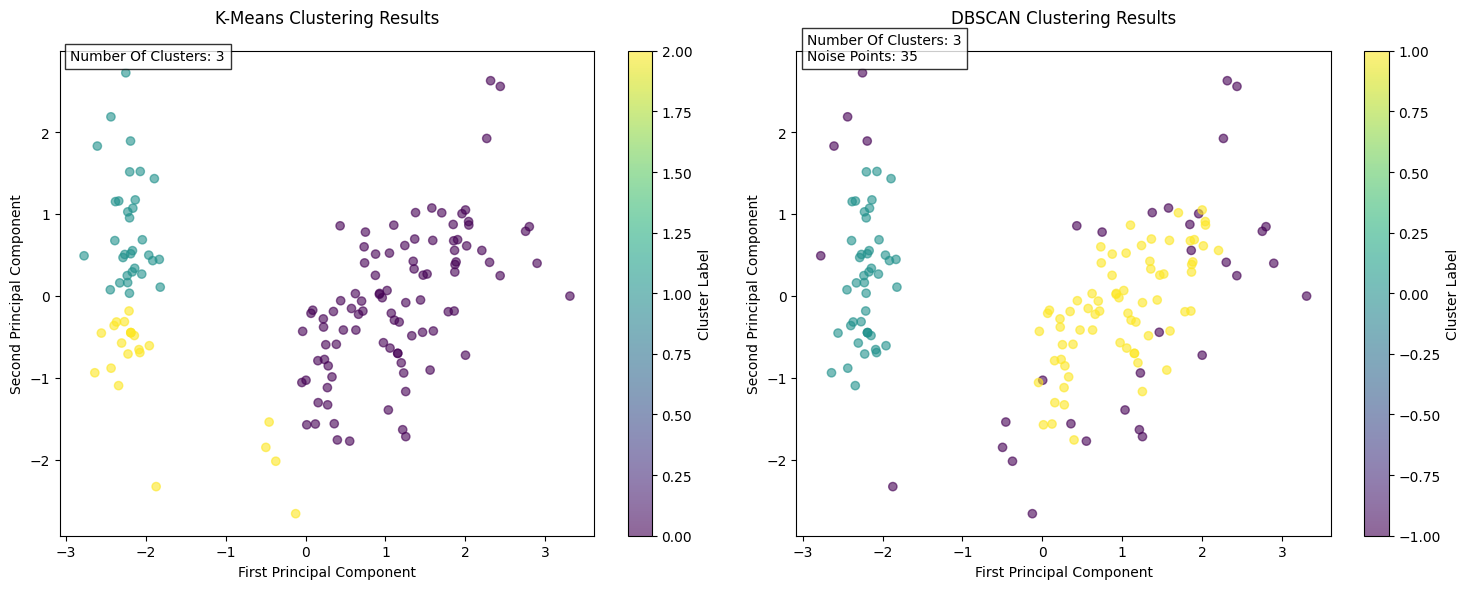


Perbandingan Hasil Clustering :
--------------------------------------------------
K-Means :
Jumlah Cluster : 3

Jumlah Sampel Di Setiap Cluster K-Means :
Label_K-Means
0    96
1    32
2    22
Name: count, dtype: int64

DBSCAN :
Jumlah Cluster : 3
Jumlah Noise Points: 35

Jumlah Sampel Di Setiap Cluster DBSCAN :
Noise Points: 35
Cluster 0: 44
Cluster 1: 71


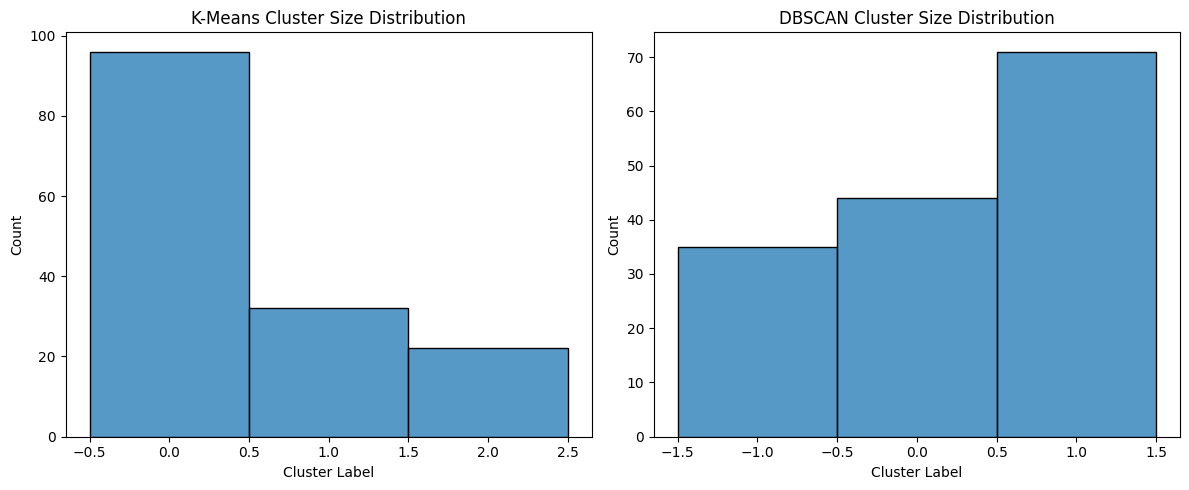

In [38]:
# Tambahkan Label Ke DataFrame
df['Label_K-Means'] = kmeans_labels
df['Label_DBSCAN'] = dbscan_labels

plt.figure(figsize=(15, 6))

# Plot Hasil K-Means
plt.subplot(1, 2, 1)
scatter_kmeans = plt.scatter(df_pca[:, 0], df_pca[:, 1],
                           c=df['Label_K-Means'],
                           cmap='viridis',
                           alpha=0.6)
plt.title('K-Means Clustering Results', pad=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter_kmeans, label='Cluster Label')

# Tambahkan Informasi Jumlah Cluster K-Means
n_clusters_kmeans = len(set(df['Label_K-Means']))
plt.text(0.02, 0.98, f'Number Of Clusters: {n_clusters_kmeans}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Plot Hasil DBSCAN
plt.subplot(1, 2, 2)
scatter_dbscan = plt.scatter(df_pca[:, 0], df_pca[:, 1],
                           c=df['Label_DBSCAN'],
                           cmap='viridis',
                           alpha=0.6)
plt.title('DBSCAN Clustering Results', pad=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter_dbscan, label='Cluster Label')

# Tambahkan Informasi Jumlah Cluster DBSCAN
n_clusters_dbscan = len(set(df['Label_DBSCAN'])) - (1 if -1 in df['Label_DBSCAN'] else 0)
n_noise = list(df['Label_DBSCAN']).count(-1)
plt.text(0.02, 0.98,
         f'Number Of Clusters: {n_clusters_dbscan}\nNoise Points: {n_noise}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print Perbandingan Statistik Clustering
print("\nPerbandingan Hasil Clustering :")
print("-" * 50)
print("K-Means :")
print(f"Jumlah Cluster : {n_clusters_kmeans}")
print("\nJumlah Sampel Di Setiap Cluster K-Means :")
print(df['Label_K-Means'].value_counts().sort_index())

print("\nDBSCAN :")
print(f"Jumlah Cluster : {n_clusters_dbscan}")
print(f"Jumlah Noise Points: {n_noise}")
print("\nJumlah Sampel Di Setiap Cluster DBSCAN :")
dbscan_counts = df['Label_DBSCAN'].value_counts().sort_index()
for label, count in dbscan_counts.items():
    if label == -1:
        print(f"Noise Points: {count}")
    else:
        print(f"Cluster {label}: {count}")

# Visualisasi Distribusi Ukuran Cluster
plt.figure(figsize=(12, 5))

# Distribution Plot Untuk K-Means
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Label_K-Means', discrete=True)
plt.title('K-Means Cluster Size Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Count')

# Distribution Plot Untuk DBSCAN
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Label_DBSCAN', discrete=True)
plt.title('DBSCAN Cluster Size Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 6. Evaluasi Model


Model Evaluation Metrics :
--------------------------------------------------
K-Means :
Silhouette Score : 0.479
Davies-Bouldin Index : 0.787

DBSCAN (Excluding Noise Points) :
Silhouette Score : 0.653
Davies-Bouldin Index : 0.499


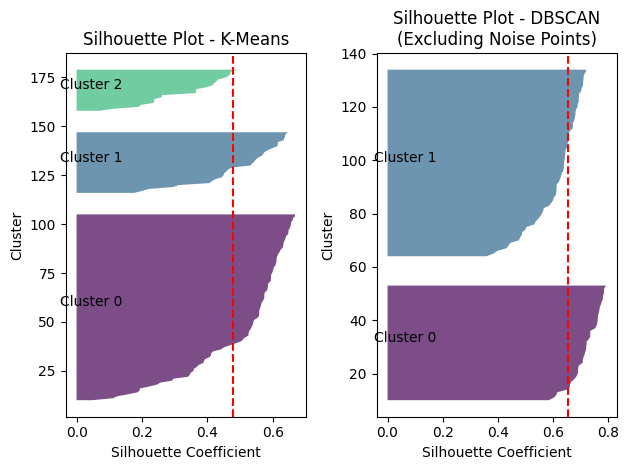


Interpretasi Hasil :
--------------------------------------------------
1. Silhouette Score :
   - Rentang nilai : -1 hingga 1
   - Semakin mendekati 1 semakin baik
   - Nilai negatif mengindikasikan kemungkinan cluster yang salah

2. Davies-Bouldin Index :
   - Semakin kecil nilainya semakin baik
   - Mengukur rata-rata kemiripan antar cluster


In [39]:
print("\nModel Evaluation Metrics :")
print("-" * 50)

# Evaluasi K-Means
kmeans_silhouette = silhouette_score(numeric_df_scaled, df['Label_K-Means'])
kmeans_db = davies_bouldin_score(numeric_df_scaled, df['Label_K-Means'])

print("K-Means :")
print(f"Silhouette Score : {kmeans_silhouette:.3f}")
print(f"Davies-Bouldin Index : {kmeans_db:.3f}")

# Evaluasi DBSCAN
dbscan_mask = df['Label_DBSCAN'] != -1
if len(set(df.loc[dbscan_mask, 'Label_DBSCAN'])) > 1:
    dbscan_silhouette = silhouette_score(numeric_df_scaled[dbscan_mask],
                                       df.loc[dbscan_mask, 'Label_DBSCAN'])
    dbscan_db = davies_bouldin_score(numeric_df_scaled[dbscan_mask],
                                    df.loc[dbscan_mask, 'Label_DBSCAN'])

    print("\nDBSCAN (Excluding Noise Points) :")
    print(f"Silhouette Score : {dbscan_silhouette:.3f}")
    print(f"Davies-Bouldin Index : {dbscan_db:.3f}")
else:
    print("\nDBSCAN :")
    print("Tidak Cukup Cluster Untuk Menghitung Metrics")

# Tambahan Visualisasi Silhouette Plot
from sklearn.metrics import silhouette_samples
import numpy as np

# Silhouette Plot Untuk K-Means
plt.subplot(1, 2, 1)
sample_silhouette_values = silhouette_samples(numeric_df_scaled, df['Label_K-Means'])
y_lower = 10
for i in range(n_clusters_kmeans):
    ith_cluster_silhouette_values = sample_silhouette_values[df['Label_K-Means'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / n_clusters_kmeans)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10

plt.axvline(x=kmeans_silhouette, color="red", linestyle="--")
plt.title('Silhouette Plot - K-Means')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')

# Silhouette Plot Untuk DBSCAN
plt.subplot(1, 2, 2)
if len(set(df.loc[dbscan_mask, 'Label_DBSCAN'])) > 1:
    sample_silhouette_values = silhouette_samples(numeric_df_scaled[dbscan_mask],
                                                df.loc[dbscan_mask, 'Label_DBSCAN'])
    y_lower = 10
    for i in sorted(set(df.loc[dbscan_mask, 'Label_DBSCAN'])):
        ith_cluster_silhouette_values = sample_silhouette_values[df.loc[dbscan_mask, 'Label_DBSCAN'] == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / n_clusters_dbscan)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        y_lower = y_upper + 10

    plt.axvline(x=dbscan_silhouette, color="red", linestyle="--")
    plt.title('Silhouette Plot - DBSCAN\n(Excluding Noise Points)')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
else:
    plt.text(0.5, 0.5, 'Insufficient clusters\nfor Silhouette Plot',
             horizontalalignment='center',
             verticalalignment='center')
    plt.title('DBSCAN Silhouette Plot\nNot Available')

plt.tight_layout()
plt.show()

# Print Interpretasi Hasil
print("\nInterpretasi Hasil :")
print("-" * 50)
print("1. Silhouette Score :")
print("   - Rentang nilai : -1 hingga 1")
print("   - Semakin mendekati 1 semakin baik")
print("   - Nilai negatif mengindikasikan kemungkinan cluster yang salah")

print("\n2. Davies-Bouldin Index :")
print("   - Semakin kecil nilainya semakin baik")
print("   - Mengukur rata-rata kemiripan antar cluster")

In [40]:
# Simpan Hasil
df.to_csv('clustering_results.csv', index=False)